# The use of feature Engineering to improve model performance

This is a basic notebook to train a  random forest classifier using the scikit learn random forest library to predict whether clients will default loan repayment . 

#Import the required modules

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
data = pd.read_csv('loan_challenge.csv', header=0)
print(data.shape)


C:\Users\maria\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,12,27,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(159596, 35)


In [ ]:
#data.info()
data.isnull().values.any()


In [7]:
data.dtypes

clientIncome                        float64
incomeVerified                       object
clientAge                             int64
clientGender                         object
clientMaritalStatus                  object
clientLoanPurpose                    object
clientResidentialStauts              object
clientState                          object
clientTimeAtEmployer                float64
clientNumberPhoneContacts            object
clientAvgCallsPerDay                 object
loanNumber                            int64
applicationDate              datetime64[ns]
approvalDate                 datetime64[ns]
disbursementDate             datetime64[ns]
payout_status                        object
dueDate                      datetime64[ns]
paidAt                       datetime64[ns]
loanAmount                            int64
interestRate                        float64
loanTerm                              int64
max_amount_taken                      int64
max_tenor_taken                 

**Fixing some columns**

1)  conversion of the date columns to the correct format.

2) obtaining the absolute values for the settleDays column

3) converting the string values of clienttimeatEmployer to numeric values


-Let's drop some columns,
-for the client time at employer column(no of months at the employer's place), it was observed that the 36+ value as converted to NAN, we have to convert it io 36.

In [3]:
data['clientTimeAtEmployer']= data['clientTimeAtEmployer'].replace('36+',36)

In [4]:
data['applicationDate'] =  pd.to_datetime(data['applicationDate'],errors="coerce"  )
data['approvalDate'] =  pd.to_datetime(data['approvalDate'],errors="coerce" )
data['disbursementDate'] =  pd.to_datetime(data['disbursementDate'],errors="coerce" )
data['dueDate'] =  pd.to_datetime(data['dueDate'], errors="coerce" )
data['paidAt'] =  pd.to_datetime(data['paidAt'],errors="coerce" )
data['repaidDate'] =  pd.to_datetime(data['repaidDate'],errors="coerce" )
data['repaymnentDueDate'] =  pd.to_datetime(data['repaymentDueDate'], errors="coerce" )
data['settleDays'] = data['settleDays'].abs()
data['clientTimeAtEmployer'] = pd.to_numeric(data['clientTimeAtEmployer'], errors='coerce')

dropping irrelevant columns

In [ ]:
data= data.drop(['loanType','declinedDate','clientId','loanId','id','ids'], axis=1)
data = data.drop(['payout_status'], axis=1) 
data = data.drop(['repaidDate','repaymentDueDate'], axis=1) 

# feature engineering with the date data

In [ ]:
#we need to drop some date columns to avoid data leakage

In [16]:
data['disburse'] = (data['disbursementDate']- data['approvalDate']).abs()
data['duepaid']= (data['paidAt']-data['dueDate']).abs()

In [17]:
data = data.drop(['disbursementDate','approvalDate', 'paidAt','dueDate','applicationDate' ], axis=1)   #drop six columns
data.head()

,clientIncome,clientAge,clientState,clientTimeAtEmployer,clientNumberPhoneContacts,clientAvgCallsPerDay,loanNumber,loanAmount,interestRate,loanTerm,...,clientLoanPurpose_house,clientLoanPurpose_medical,clientLoanPurpose_other,clientResidentialStauts_Family Owned,clientResidentialStauts_Null,clientResidentialStauts_Own Residence,clientResidentialStauts_Rented,clientResidentialStauts_Temp. Residence,disburse,duepaid
0,35000.00,28,OYO,36.0,1917,0.259357403,4,37500,12.5,90,...,1,0,0,0,0,1,0,0,0 days,1 days 00:36:29
1,70833.33,41,KWARA,36.0,5678,296.338843,8,84500,7.5,180,...,0,0,0,0,0,1,0,0,0 days,97 days 03:45:51
2,25000.00,38,LAGOS,36.0,231,7.875,2,25000,15.0,60,...,1,0,0,0,0,0,1,0,0 days,2 days 02:48:30
3,35000.00,32,LAGOS,36.0,1083,73.22033898,2,40000,10.0,60,...,0,0,0,0,0,0,1,0,0 days,9 days 20:41:07
4,97865.00,36,ABUJA,27.0,4001,22.60787172,9,162500,5.0,180,...,0,0,0,1,0,0,0,0,0 days,83 days 22:21:27


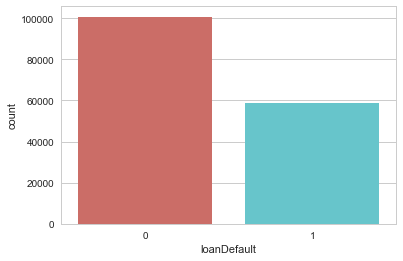

0    100740
1     58856
Name: loanDefault, dtype: int64

In [8]:
sns.countplot(x='loanDefault',data=data, palette='hls')
plt.show()
data['loanDefault'].value_counts()

In [9]:
count_no_defaulters = len(data[data['loanDefault']==0])
count_defaulters = len(data[data['loanDefault']==1])
pct_of_no_defaulters = count_no_defaulters/(count_no_defaulters+count_defaulters)
print("percentage of non loan_defaults is", pct_of_no_defaulters*100)
pct_of_defaulters = count_defaulters/(count_no_defaulters+count_defaulters)
print("percentage of loan_defaulters", pct_of_defaulters*100)

percentage of non loan_defaults is 63.12188275395373
percentage of loan_defaulters 36.878117246046266


we can see from the above analysis that our classes are imbalanced.  The ratio of non defaulters to defaulters in 63:37. Hence, we need to balance the data for our algorithm to perform better.

#One hot encoding. Let's create the dummy variables

In [12]:
#Handling categorical column, 
cat_feats = ['incomeVerified','clientGender','clientMaritalStatus','clientLoanPurpose','clientResidentialStauts']
data = pd.get_dummies(data,columns=cat_feats,drop_first=True)

In [35]:
data= data.drop('clientState', axis=1)
data= data.drop('repaymnentDueDate', axis=1)

In [36]:
data['disburse'] = pd.to_numeric(data['disburse'], errors='coerce')
data['duepaid'] = pd.to_numeric(data['duepaid'], errors='coerce')

In [37]:
data.shape

(159596, 36)

In [38]:
x1 = data.drop('loanDefault',axis=1)
y1 = data.loanDefault

In [39]:
#type(x1)
x1.dtypes

clientIncome                               float64
clientAge                                    int64
clientTimeAtEmployer                       float64
clientNumberPhoneContacts                   object
clientAvgCallsPerDay                        object
loanNumber                                   int64
loanAmount                                   int64
interestRate                               float64
loanTerm                                     int64
max_amount_taken                             int64
max_tenor_taken                              int64
settleDays                                   int64
firstPaymentRatio                          float64
firstPaymentDefault                          int64
incomeVerified_True                          uint8
incomeVerified_FALSE                         uint8
incomeVerified_Null                          uint8
incomeVerified_TRUE                          uint8
clientGender_MALE                            uint8
clientMaritalStatus_Married    

some columns were observed to contain "Null" as their values. A box plot is plotted for the numerical  features to get a good picture of the distribution of data. The 'Null' value will be replaced with the median value of the column. The Null values were converted to zero first, before being replaced with the median values.The mean was not used because outliers were observed in some columns and it will affect the computed values as seen in the plot below.

In [40]:
#join_train.fillna(-999,inplace=True)

x1 = x1.replace('Null',0)
x1.fillna(0,inplace=True)


In [41]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values= 0, strategy='median', axis=1)
x1= imp.fit_transform(x1)

#This will look for all columns where we have 0 value and replace the 0 value with the median.

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [42]:
from sklearn.model_selection import train_test_split
x1_train, x_test, y1_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=42)
print('Training Features Shape:', x1_train.shape)
print('Training Labels Shape:', y1_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (111717, 35)
Training Labels Shape: (111717,)
Testing Features Shape: (47879, 35)
Testing Labels Shape: (47879,)


** Let's balance the classes: Over-sampling technique  using SMOTE from the imbalance learn python library**

first, we split our data into training and test sets

We apply the over-sampling technique to only the training set

In [43]:
import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
x_train, y_train = smote.fit_sample(x1_train, y1_train)
print('Training Features Balanced Shape:', x_train.shape)
print('Training Labels Balanced Shape:', y_train.shape)
print('Testing Features Balanced Shape:', x_test.shape)
print('Testing Labels Balanced Shape:', y_test.shape)


Training Features Balanced Shape: (140858, 35)
Training Labels Balanced Shape: (140858,)
Testing Features Balanced Shape: (47879, 35)
Testing Labels Balanced Shape: (47879,)


#Feature selection with PCA

I performed some feature selection with PCA but noticed that my accuracy score was lower, hence i decided to use all features. It seems most of the features are important to our target variable prediction.with principal components= 5, i got accuracy of 0.64, principal component = 11, accuracy is 0.66, while with all features, accuracy is 0.74. Below are the codes i used for the PCA .

from sklearn.decomposition import PCA

-create pca

pca = PCA(n_components=11)

-fit the data to the model

principalComponents = pca.fit_transform(x1)

-create dataframe containing principal components

x = pd.DataFrame(data = principalComponents)

**Lets scale our data :**  We use the StandardScaler function from the Scikit Learn preprocessing package to Zscore scale the numeric features. The scaler is fit only on the training data. The trained scaler is then applied to the test data. Test data should always be scaled using the parameters from the training data.

In [44]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)


#Lets implement our model : Random Forest and Confusion matrix


Most important hyperparameters of Random Forest:

1)n_estimators = n of trees

2)max_features = max number of features considered for splitting a node

3)max_depth = max number of levels in each decision tree

4)min_samples_split = min number of data points placed in a node before the node is split

5)min_samples_leaf = min number of data points allowed in a leaf node

6)bootstrap = method for sampling data points (with or without replacement)







**Based on the above explanations, I tuned my hyperparameters severally with different values before concluding to use the values in my classifier model below.**

In [ ]:
#Predicting the test set with random forest classifier 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

#In order to get the best of the random forest classifier, the following hyper-parameters were tuned from the default values
clf_rf = RandomForestClassifier(random_state=50, n_estimators=100, min_samples_leaf = 60,max_depth= 120, max_features = 0.9, n_jobs = -1, min_samples_split= 10)      
clr_rf = clf_rf.fit(x_train,y_train)
y_pred = clf_rf.predict(x_test)

#Ploting the confusion matrix
cm2 = confusion_matrix(y_test,y_pred)
sns.heatmap(cm2,annot=True,fmt="d")

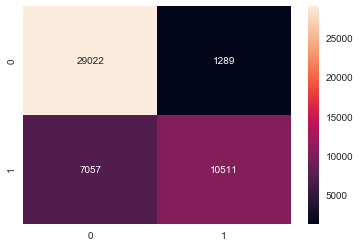

In [45]:
#Predicting the test set with random forest classifier 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

#In order to get the best of the random forest classifier, the following hyper-parameters were tuned from the default values
clf_rf = RandomForestClassifier(random_state=42, n_estimators=100)
                                  
clr_rf = clf_rf.fit(x_train,y_train)
y_pred = clf_rf.predict(x_test)

#Ploting the confusion matrix
cm2 = confusion_matrix(y_test,y_pred)
sns.heatmap(cm2,annot=True,fmt="d")

In [48]:
from sklearn.model_selection import cross_val_score
clf_rf_score = cross_val_score(clf_rf, x1, y1, cv=10, scoring='roc_auc')
print("=== All AUC Scores ===")
print(clf_rf_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", round(clf_rf_score.mean(),2))

=== All AUC Scores ===
[0.87011044 0.90266412 0.88702872 0.85042554 0.91091656 0.93941702
 0.90623411 0.89270189 0.90681443 0.85907402]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.89


**Let's Plot the ROC curve**

In [54]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
    
y_pred = clf_rf.predict_proba(x_test)
print_metrics(y_test, y_pred, 0.5)  

                 Confusion matrix
                 Score positive    Score negative
Actual positive     29022              1289
Actual negative      7057             10511

Accuracy        0.83
AUC             0.90
Macro precision 0.85
Macro recall    0.78
 
           Positive      Negative
Num case    30311         17568
Precision    0.80          0.89
Recall       0.96          0.60
F1           0.87          0.72


In [55]:
import sklearn.metrics as sklm

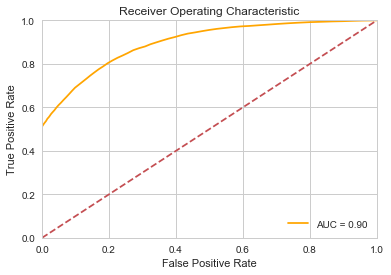

In [56]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, y_pred)   

**Performance Metrics: Evaluating the Random Forest Network model on Test set **

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
ac = accuracy_score(y_test,y_pred)
print('Accuracy of random forest classifier on test set: ', round(ac,2))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87     30311
           1       0.89      0.60      0.72     17568

    accuracy                           0.83     47879
   macro avg       0.85      0.78      0.80     47879
weighted avg       0.84      0.83      0.82     47879

Accuracy of random forest classifier on test set:  0.83


 **Performance Metrics: Evaluating the Random Forest model on Training set **

In [47]:
from sklearn.metrics import classification_report

y_pred2 = clf_rf.predict(x_train)
print(classification_report(y_train, y_pred2))
ac = accuracy_score(y_train,y_pred2)
print('Accuracy of random forest classifier on train set: ',round(ac,2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70429
           1       1.00      1.00      1.00     70429

    accuracy                           1.00    140858
   macro avg       1.00      1.00      1.00    140858
weighted avg       1.00      1.00      1.00    140858

Accuracy of random forest classifier on train set:  1.0
